In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [9]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [28]:
x=df.iloc[:,2:4]
y=df.iloc[:,-1]
x
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [29]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [30]:
X_train.shape


(320, 2)

In [31]:
X_test.shape


(80, 2)

In [32]:
Y_train.shape


(320,)

In [33]:
X_test.shape


(80, 2)

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc= StandardScaler()

In [36]:
sc.fit_transform(X_train,X_test)

array([[-1.06675246, -0.38634438],
       [ 0.79753468, -1.22993871],
       [ 0.11069205,  1.853544  ],
       [ 0.60129393, -0.90995465],
       [ 1.87685881, -1.28811763],
       [-0.57615058,  1.44629156],
       [ 0.3069328 , -0.53179168],
       [ 0.99377543,  0.10817643],
       [-1.16487283,  0.45724994],
       [-1.55735433,  0.31180264],
       [ 1.0918958 ,  0.45724994],
       [-0.18366908, -0.47361276],
       [ 0.20881242, -0.32816546],
       [ 0.3069328 ,  0.28271318],
       [-1.16487283, -1.57901222],
       [ 0.11069205,  0.25362372],
       [ 2.07309956,  1.73718616],
       [ 0.40505317, -0.18271817],
       [ 1.4843773 ,  2.11534913],
       [-0.37990983,  1.21357589],
       [ 1.87685881,  1.50447048],
       [ 0.11069205,  0.02090805],
       [ 0.89565505, -1.31720709],
       [-1.36111358, -1.49174384],
       [-0.18366908, -0.5899706 ],
       [-0.57615058,  2.31897535],
       [ 0.99377543, -1.20084925],
       [-0.77239133,  1.06812859],
       [ 2.17121993,

In [38]:
from sklearn.linear_model import LogisticRegression

In [40]:
le=LogisticRegression()

In [41]:
le.fit(X_train,Y_train)
pred = le.predict(X_test)

print(X_test[:10])
print('-'*25)
print(pred[:10])

     Age  EstimatedSalary
209   46            22000
280   59            88000
33    28            44000
210   48            96000
93    29            28000
84    30            62000
329   47           107000
94    29            83000
266   40            75000
126   42            65000
-------------------------
[0 0 0 0 0 0 0 0 0 0]


In [42]:

print('Expected Output:',pred[:10])
print('-'*25)
print('Predicted Output:\n',Y_test[:10])

Expected Output: [0 0 0 0 0 0 0 0 0 0]
-------------------------
Predicted Output:
 209    0
280    1
33     0
210    1
93     0
84     0
329    1
94     0
266    0
126    0
Name: Purchased, dtype: int64


In [43]:
from sklearn.metrics import confusion_matrix

In [45]:

matrix = confusion_matrix(Y_test,pred,labels=le.classes_)
print(matrix)

[[52  0]
 [28  0]]


In [46]:
 tp,fn,fp,tn = confusion_matrix(Y_test,pred,labels=[1,0]).reshape(-1)

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

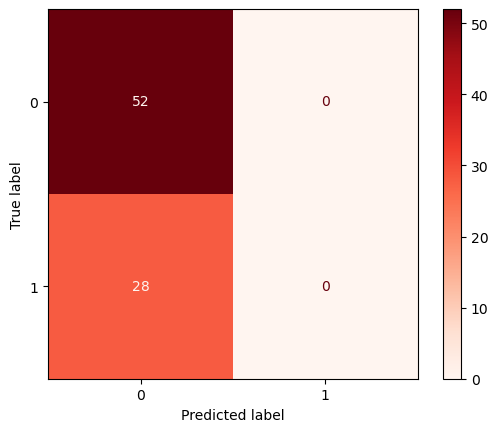

In [53]:

conf_matrix=ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=le.classes_)
conf_matrix.plot(cmap=plt.cm.Reds)
plt.show()

In [70]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
import numpy as np

In [71]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



C:\Users\mitra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mitra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mitra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:

print('\nAccuracy: {:.2f}'.format(accuracy_score(Y_test,pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.65
Error Rate:  0.35
Sensitivity (Recall or True positive rate) : 0.0
Specificity (True negative rate) : 1.0
Precision (Positive predictive value) : nan
False Positive Rate : 0.0


C:\Users\mitra\AppData\Local\Temp\ipykernel_16536\1329449468.py:5: RuntimeWarning: invalid value encountered in longlong_scalars
  print('Precision (Positive predictive value) :',tp/(tp+fp))


In [73]:
tp

0

In [74]:
fp

0

In [75]:
tn

52

In [76]:
fn

28